# WHITE Wine Quality Predection

Dataset Link:https://archive.ics.uci.edu/ml/datasets/wine+quality

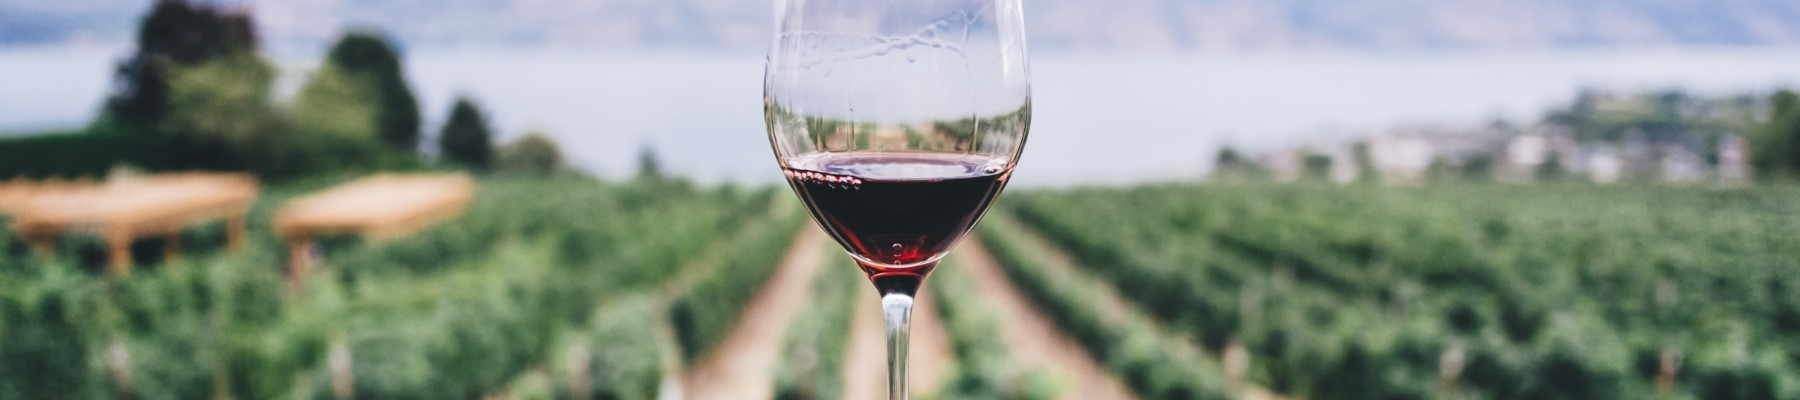

## Probelm Statement

The quality of a wine is important for the consumers as well as the
wine industry. The traditional (expert) way of measuring wine quality
is time-consuming. Nowadays, machine learning models are
important tools to replace human tasks. In this case, there are several
features to predict the wine quality but the entire features will not be
relevant for better prediction. So, our thesis work is focusing on what
wine features are important to get the promising result. For the purpose
of classification model and evaluation of the relevant features

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [2]:
wine=pd.read_csv('winequality-white.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine.shape

(4898, 12)

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

 **Attribute Information:**

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Checking the Null values**

In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Checking the Duplicated values**

In [9]:
wine.duplicated().sum()

937

**Handling Duplicates**

In [10]:
wine.drop_duplicates(inplace=True,ignore_index=True)

In [11]:
wine.shape

(3961, 12)

In [12]:
wine['quality'].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [13]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.139869,0.382157,0.305229,4.499346,0.050059,23.127451,124.127451,0.994199,3.185425,0.476667,10.197712
5,6.921745,0.303306,0.335957,6.941532,0.052323,36.002979,150.099574,0.995072,3.171779,0.482621,9.864182
6,6.819435,0.261630,0.338227,5.959787,0.045178,35.308166,136.460850,0.993722,3.196029,0.492355,10.646122
7,6.701089,0.265363,0.327358,4.523875,0.037556,33.851234,122.052975,0.992059,3.228462,0.502859,11.515844
8,6.609924,0.286794,0.335038,5.056489,0.036756,35.618321,122.034351,0.991745,3.235115,0.485878,11.880153
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


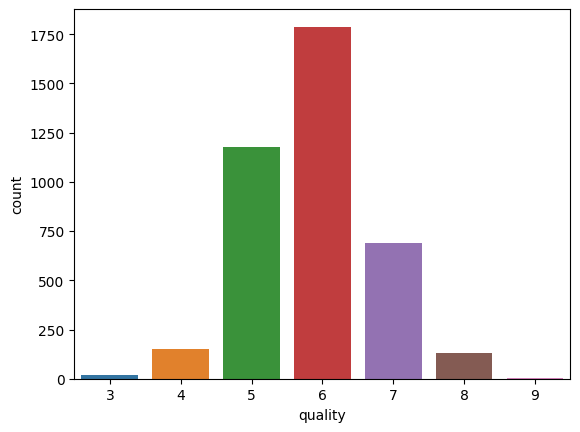

In [14]:
sns.countplot(x=wine['quality'])
plt.show()

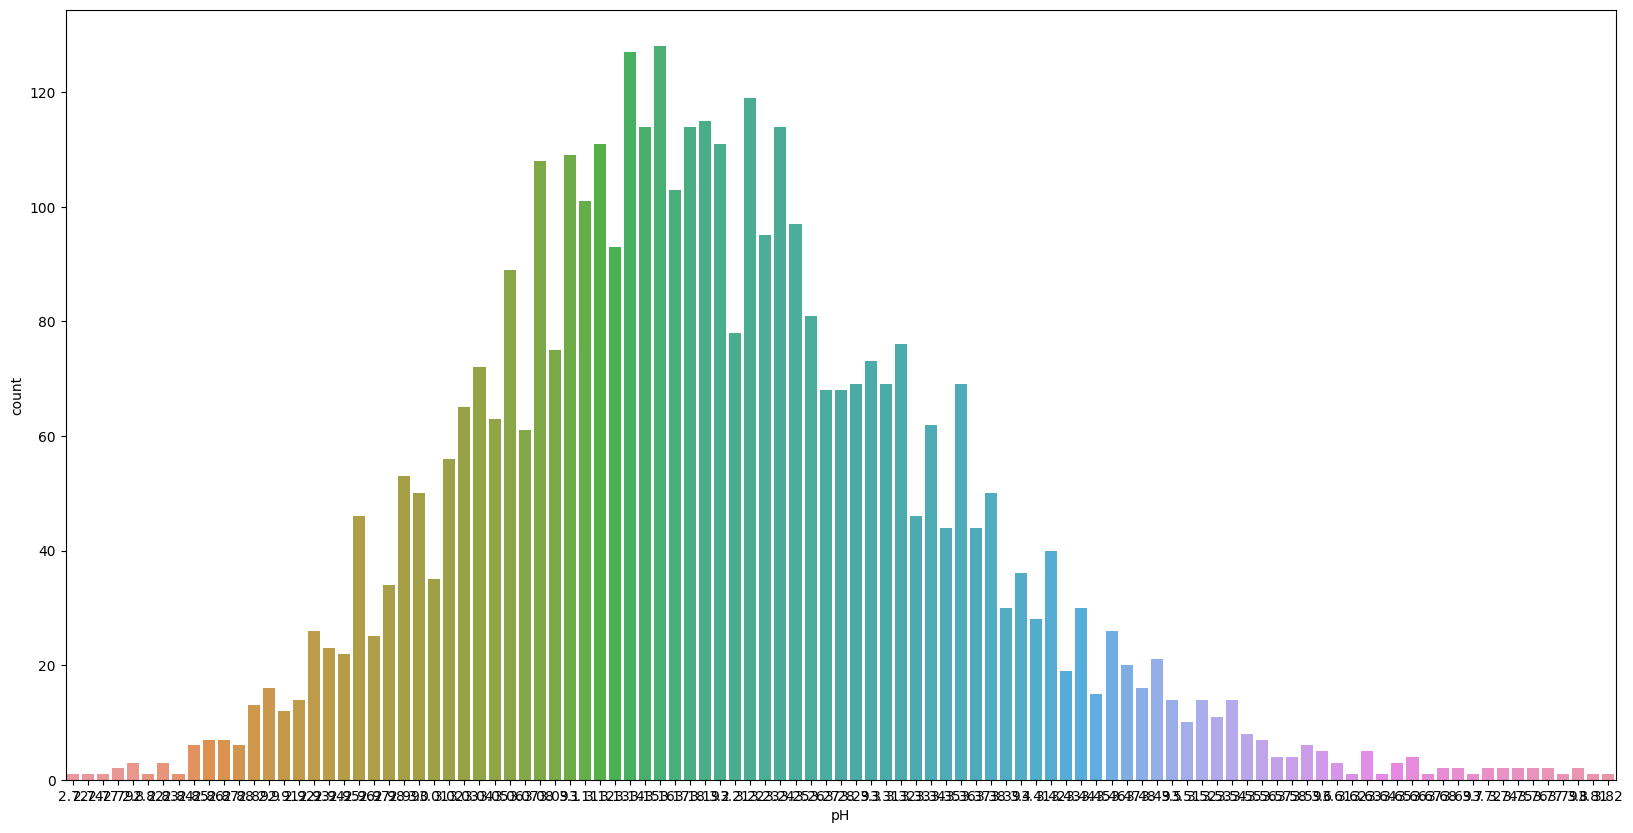

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x=wine['pH'])
plt.show()

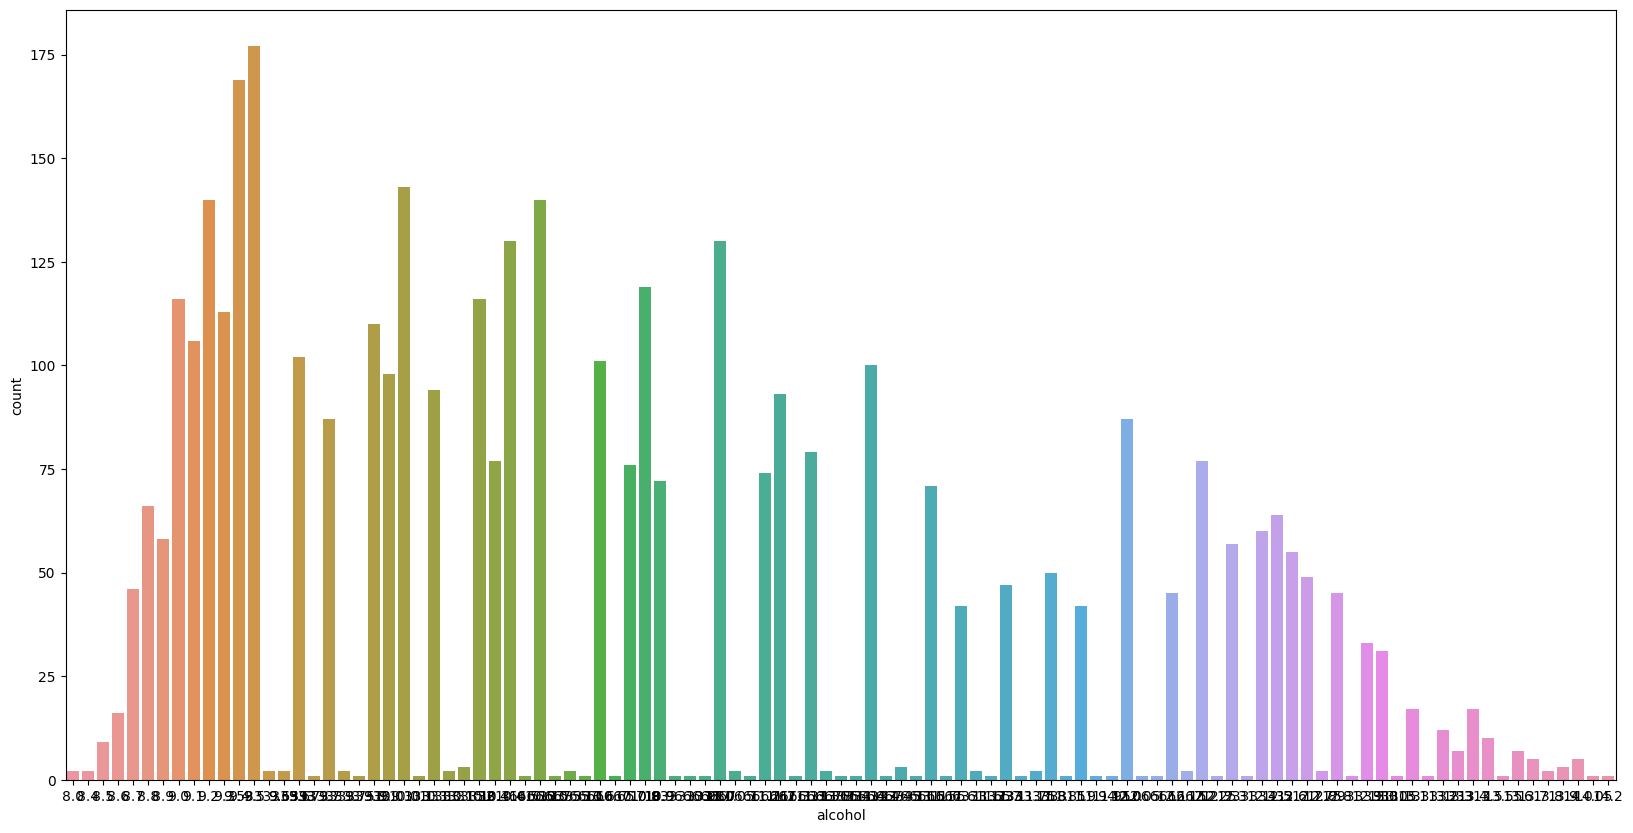

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x=wine['alcohol'])
plt.show()

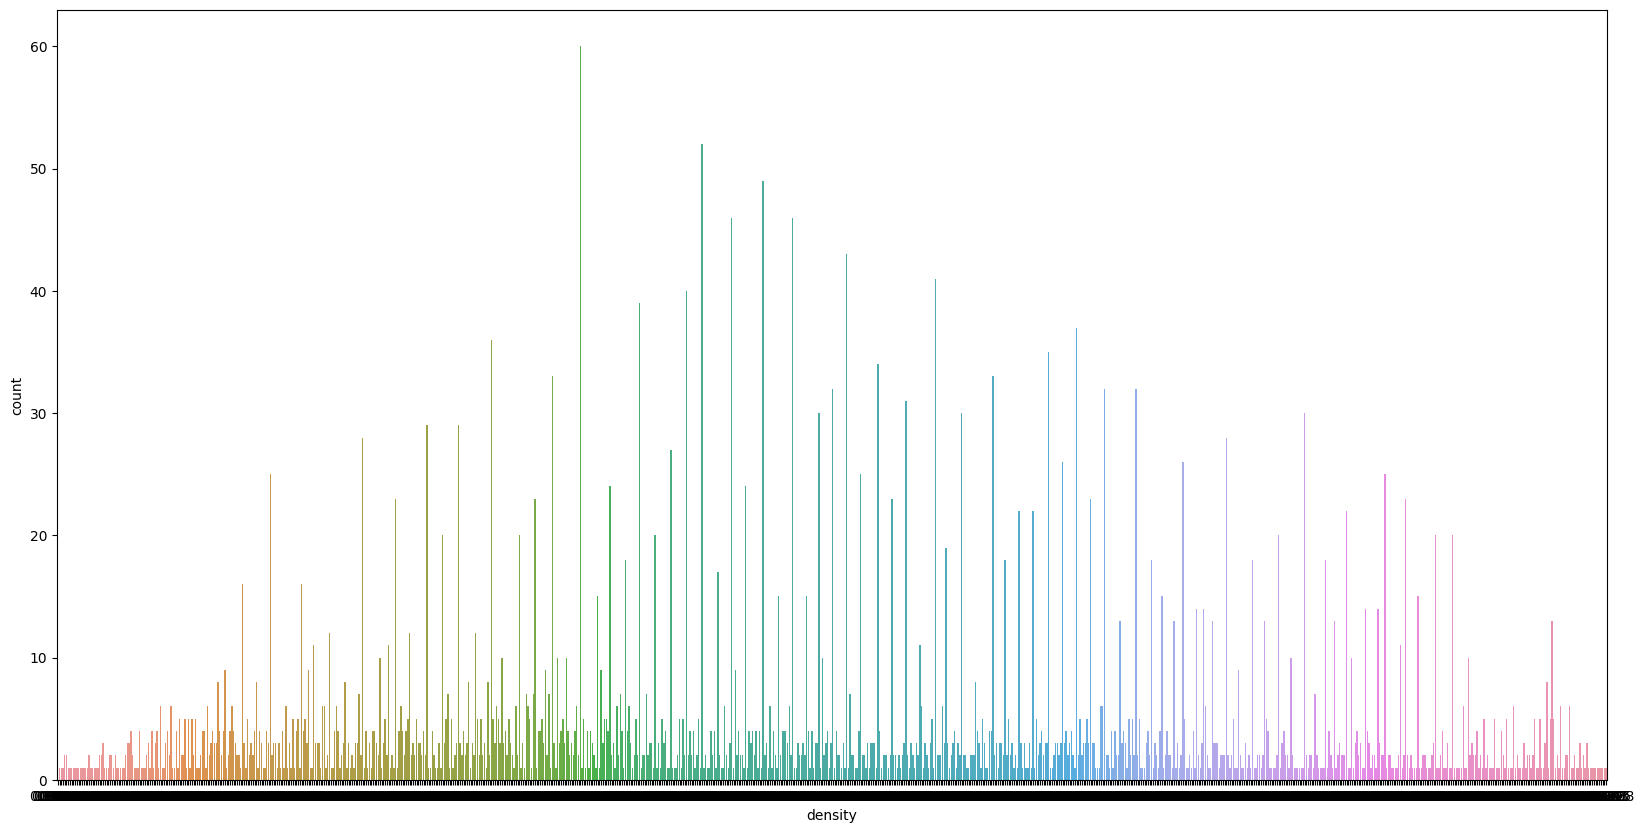

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x=wine['density'])
plt.show()

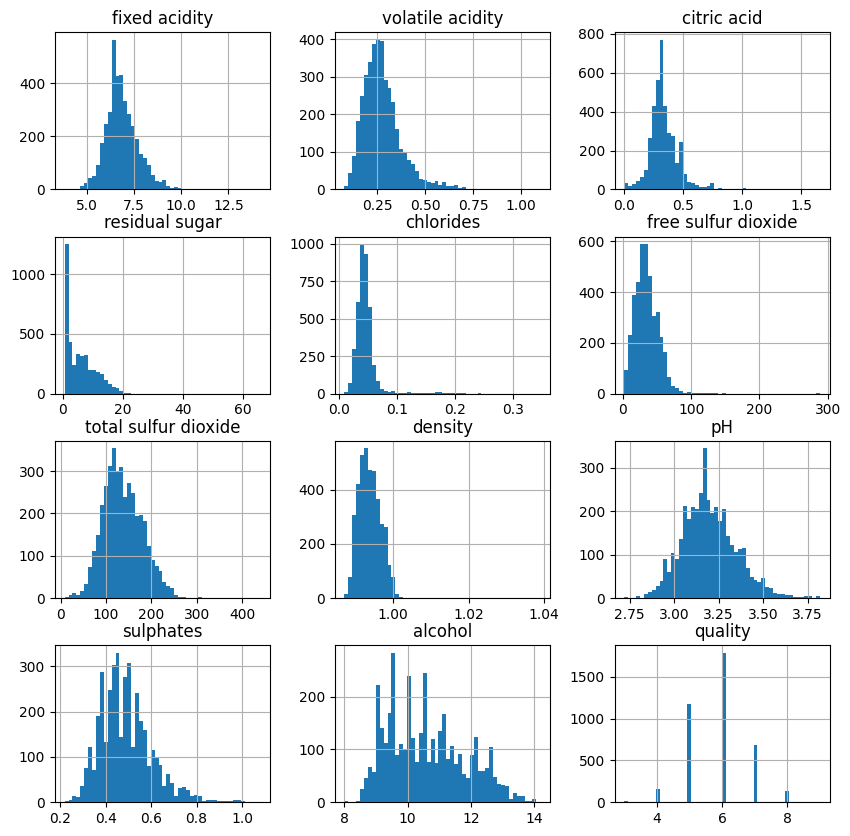

In [18]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

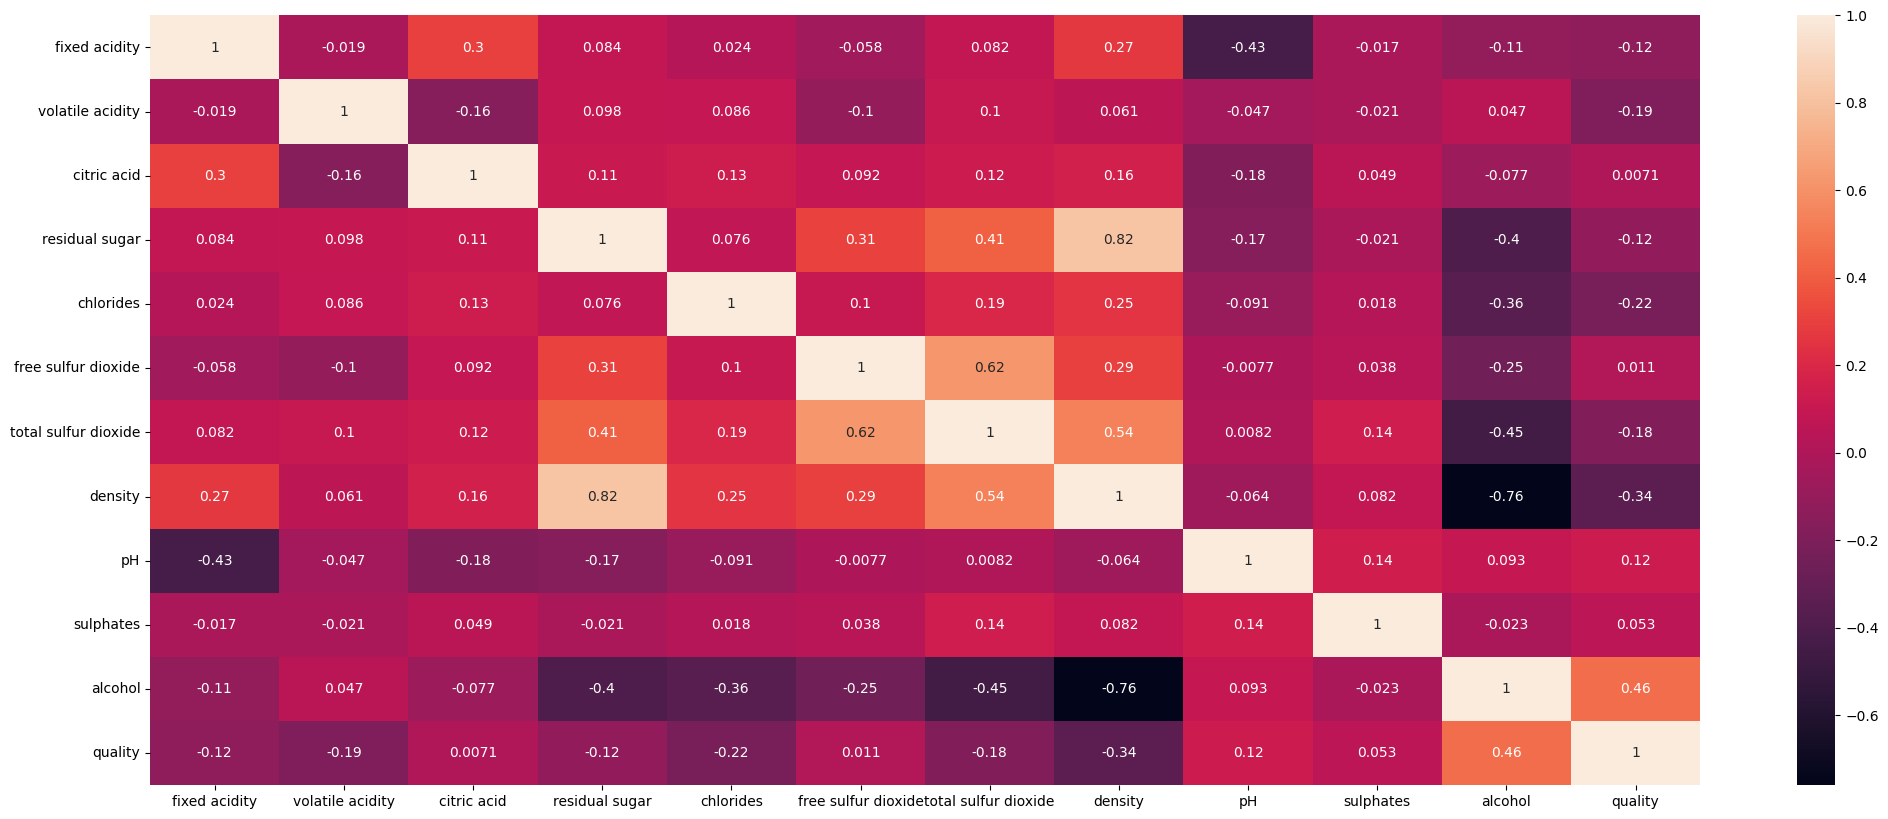

In [19]:
corr=wine.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**The strongly correlated items are :**

1.Residual sugar and density.

2.free sulphur dioxide and total sulphor dioxide.

3.sulphor dioxide and density.

4.alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

In [20]:
wine.corr()['quality'].sort_values(ascending=True)

density                -0.337805
chlorides              -0.217739
volatile acidity       -0.190678
total sulfur dioxide   -0.183356
fixed acidity          -0.124636
residual sugar         -0.117339
citric acid             0.007065
free sulfur dioxide     0.010507
sulphates               0.053200
pH                      0.123829
alcohol                 0.462869
quality                 1.000000
Name: quality, dtype: float64

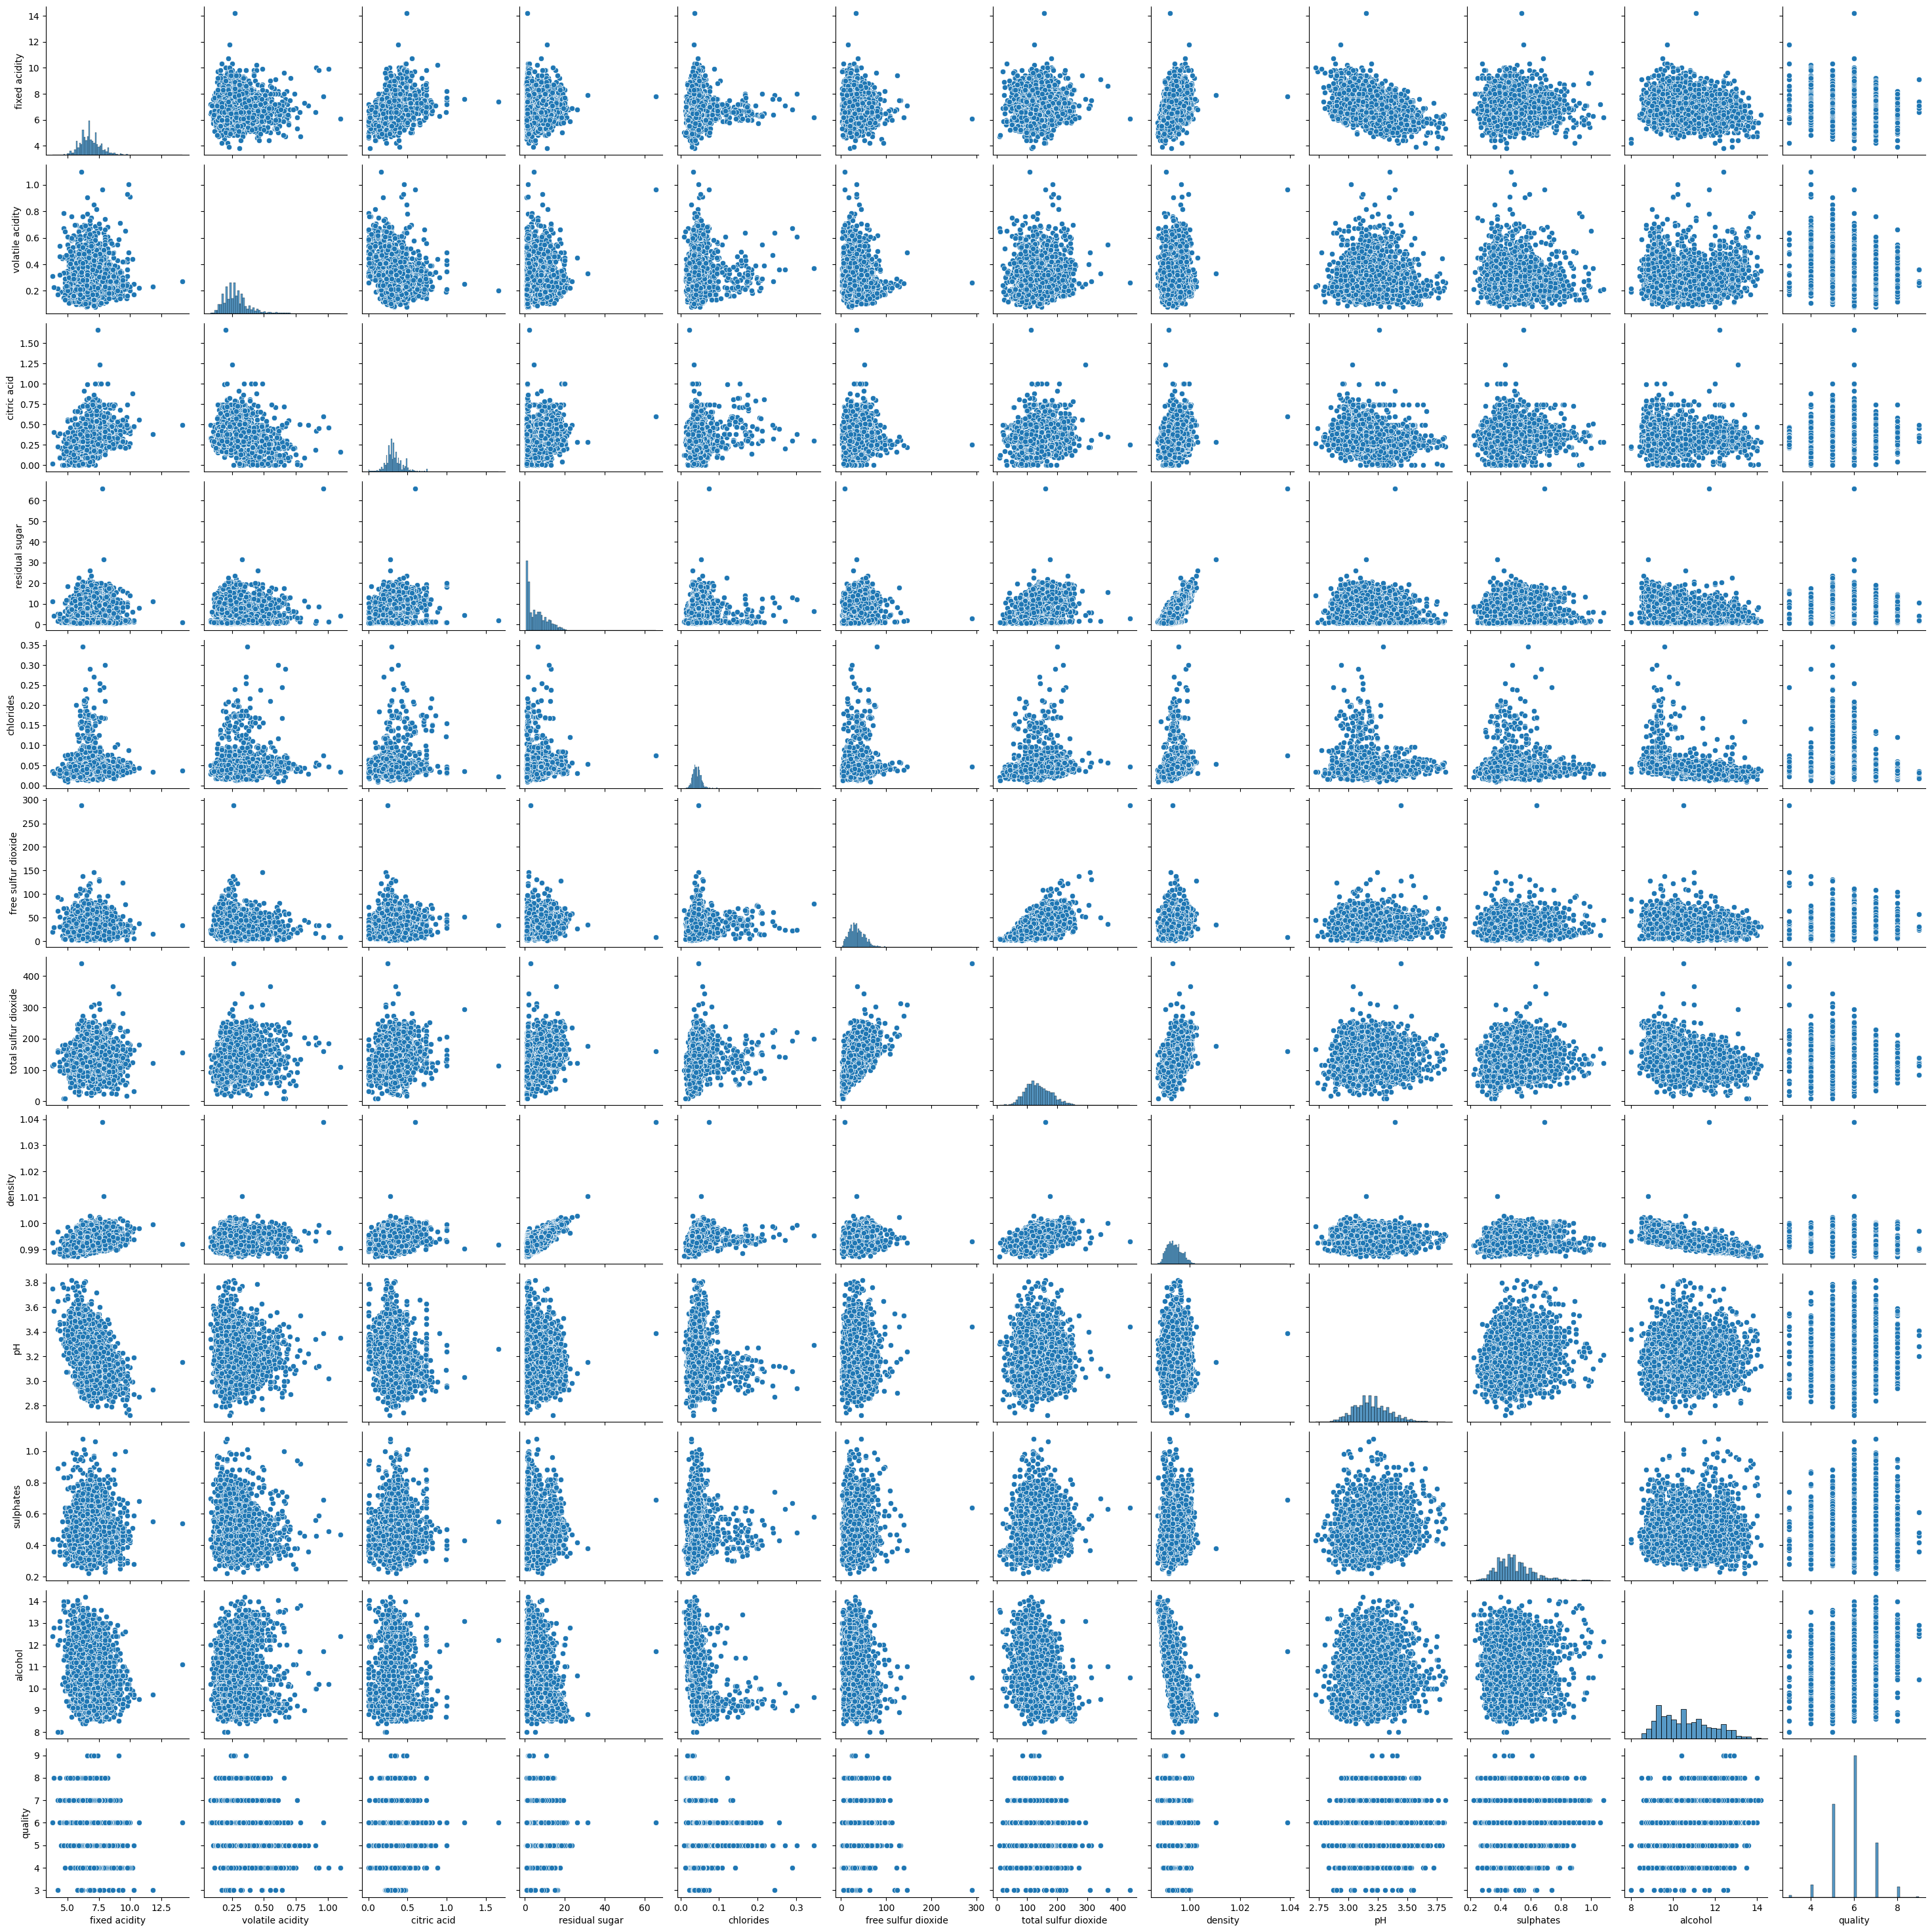

In [21]:
sns.pairplot(wine)

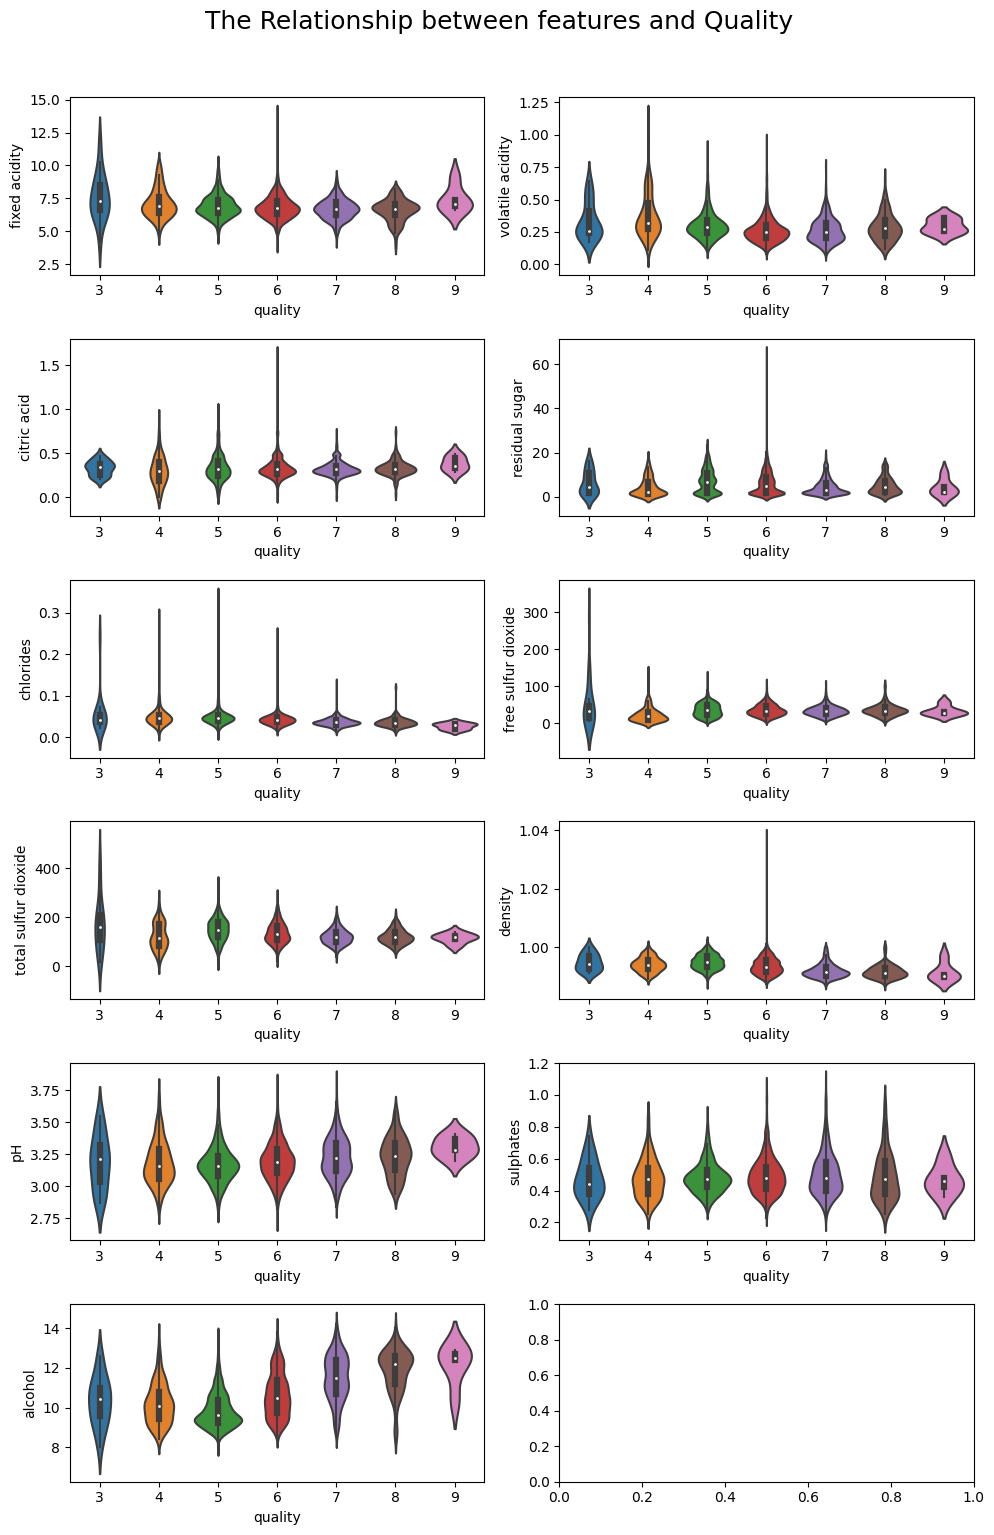

In [22]:
fig, axs = plt.subplots(6,2, figsize=(10,15))
for i, ax in zip(wine.keys()[:-1],axs.ravel()):
    sns.violinplot(data=wine, x='quality',y= i, ax=ax)
plt.suptitle("The Relationship between features and Quality", y=1.02, size=18)
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

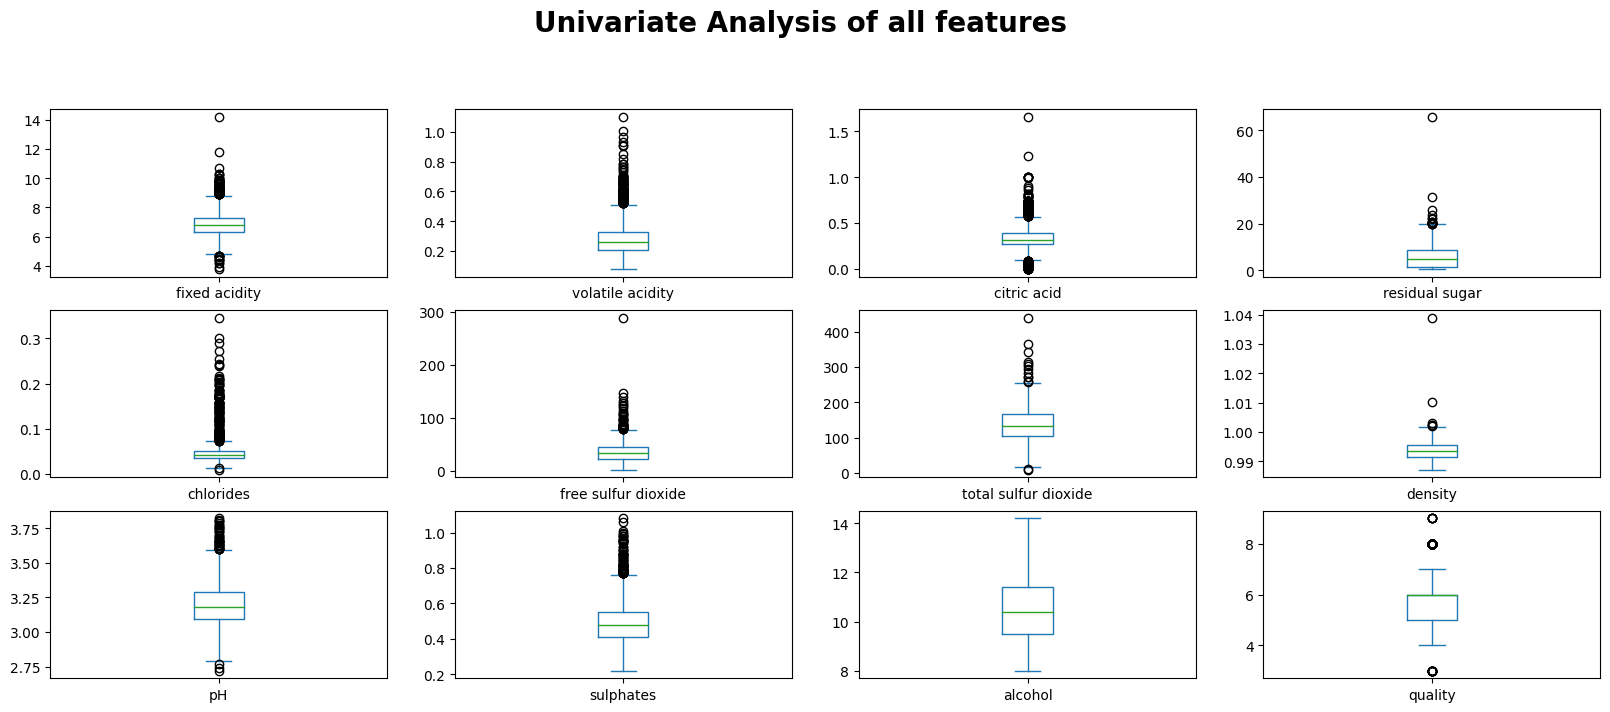

In [23]:
plt.figure(figsize=(20,15))
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False,figsize=(20,10))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold")
plt.show()

<Figure size 2000x1500 with 0 Axes>

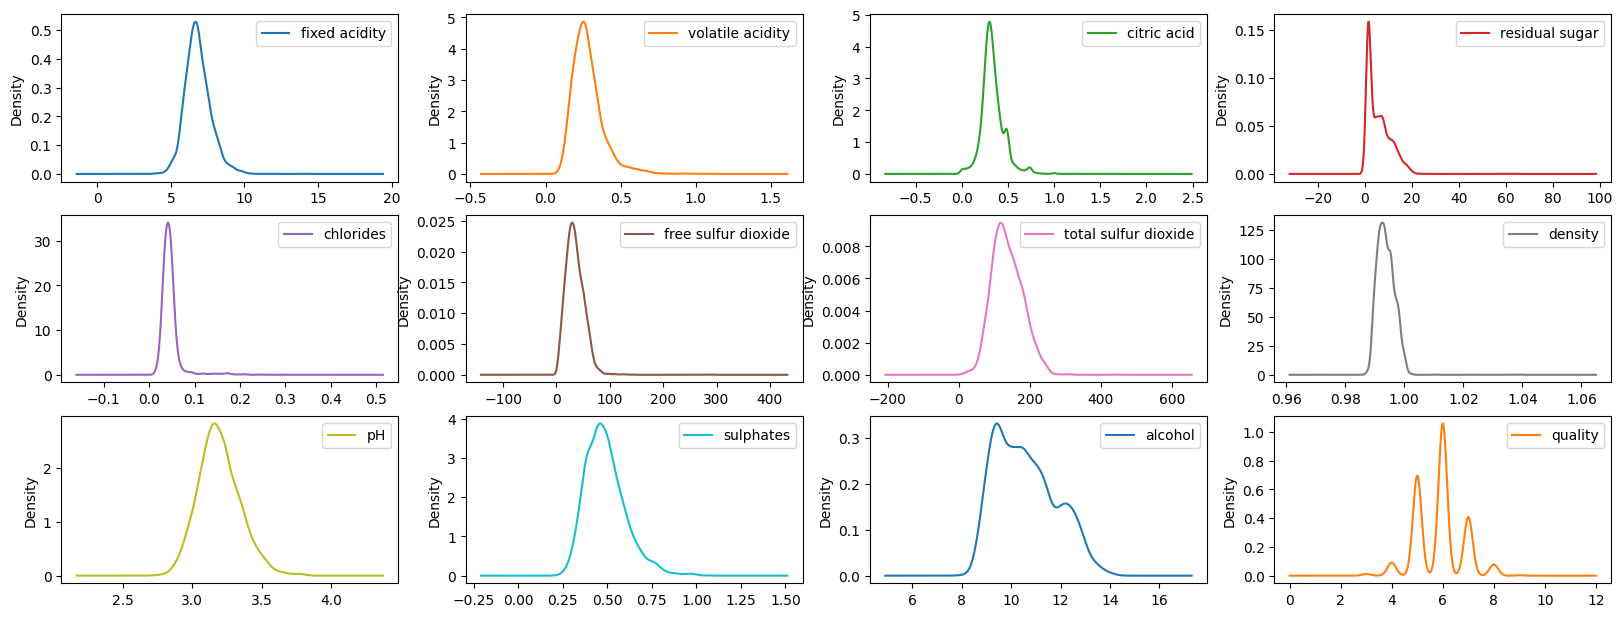

In [24]:
plt.figure(figsize=(20,15))
wine.plot(kind ='density',subplots = True, layout =(4,4),sharex = False,figsize=(20,10))
plt.show()

In [25]:
wine['quality']=wine['quality'].apply(lambda x:1 if x>=7 else 0)

In [26]:
wine['quality'].value_counts()
#1...........good quality
#0............bad quality

0    3136
1     825
Name: quality, dtype: int64

**Seperate Independent and dependent features**

In [27]:
X=wine.drop('quality',axis=1)
y=wine['quality']

**Feature Selection**

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier()
clf.fit(X,y)

ExtraTreesClassifier()

In [29]:
score=clf.feature_importances_

In [30]:
s1=pd.Series(score,index=X.columns)

<AxesSubplot: >

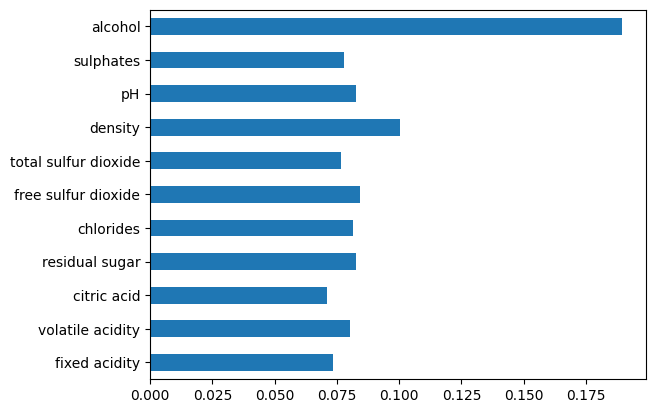

In [31]:
s1.plot(kind='barh',)

All features are important

**scaling**

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [33]:
X_sc=sc.fit_transform(X)

**Model Selection**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [35]:
models=[LogisticRegression(),SVC(),RandomForestClassifier(),DecisionTreeClassifier(),ExtraTreesClassifier(),XGBClassifier()]

In [36]:
#Hyper-Parameters for different algorithms
params={'log_params':{'C':[1,2,3,4,5,6,7],
                      'penalty':['l1','l2','elasticnet', None]},
        'svc_params':{'C':[1,2,3,4,5,6,7]},
                    
    'rfc_params':{'n_estimators':[100,200, 300],
           'max_depth': [None, 5,10],
           'min_samples_leaf': [5,10,15]},

'dtc_param':{'criterion' : ['gini','entropy'],
             'max_depth': [None, 5,10],
             'min_samples_leaf': [5,10,15]},


'etc_params':{'n_estimators':[100,200, 300],
           'max_depth': [None, 5,10],
           'min_samples_leaf': [5,10,15]},

'xgbc_params':{'max_depth': [2,4,6],
            'min_child_weight': [2,4,6],
            'gamma': [i/10 for i in range(4)]}}

In [37]:
param_list=list(params.keys())

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
#Defining Function for Model Selection
def model_selection(models,params):
    result=[]
    i=0
    for model in models:
        param=params[param_list[i]]
        i+=1
        clf=RandomizedSearchCV(model,param,cv=5)
        clf.fit(X_sc,y)
        result.append({'model':model,'score':clf.best_score_,'parameter':clf.best_params_})
    result_df=pd.DataFrame(result)
    return result_df

In [40]:
model_selection(models,params)

,model,score,parameter
0,LogisticRegression(),0.804843,"{'penalty': 'l2', 'C': 1}"
1,SVC(),0.812926,{'C': 2}
2,RandomForestClassifier(),0.812671,"{'n_estimators': 300, 'min_samples_leaf': 5, '..."
3,DecisionTreeClassifier(),0.799034,"{'min_samples_leaf': 10, 'max_depth': 5, 'crit..."
4,ExtraTreesClassifier(),0.807625,"{'n_estimators': 200, 'min_samples_leaf': 5, '..."
5,"XGBClassifier(base_score=None, booster=None, c...",0.808881,"{'min_child_weight': 6, 'max_depth': 2, 'gamma..."


**Conclusion:**
From Above Models We Can Choose Random Forest Classifier With Best Parameters To Train The Model To Get Highest Accuracy

**Split Data into training and test dataset**

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [42]:
X_train.shape,y_train.shape

((3168, 11), (3168,))

In [43]:
X_test.shape,y_test.shape

((793, 11), (793,))

In [44]:
#Scaling The X_train and X_test
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Model Training**

In [45]:
clf2=RandomForestClassifier(n_estimators=200,min_samples_leaf=5,max_depth=5)
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200)

**Prediction**

In [46]:
y_pred=clf2.predict(X_test)

**Evaluating The Results**

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)

Accuracy Score: 0.8032786885245902


TN:  591
FN:  138
TP:  46
FP:  18


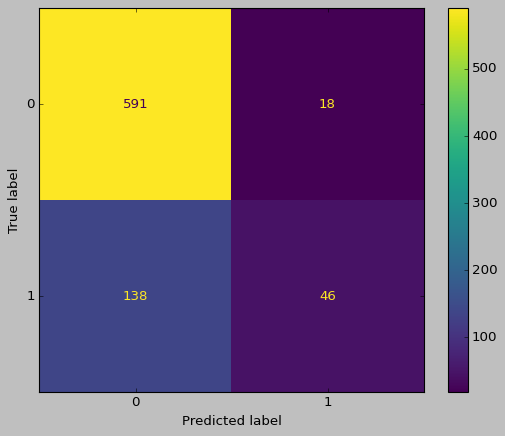

In [48]:
style.use('classic')
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

**Model Training with ANN**

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dense


In [50]:
ann=Sequential()
ann.add(tf.keras.Input(shape=(11,)))
ann.add(Dense(units=8,activation='relu'))
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))

In [51]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

In [52]:
ann.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
early=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=12,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [54]:
ann.fit(X_train,y_train,batch_size=10,epochs=1000,validation_data=(X_test,y_test),callbacks=early)

Epoch 1/1000
317/317 [==============================] - 2s 3ms/step - loss: 0.4894 - accuracy: 0.7781 - val_loss: 0.4811 - val_accuracy: 0.7768
Epoch 2/1000
317/317 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8071 - val_loss: 0.4442 - val_accuracy: 0.7957
Epoch 3/1000
317/317 [==============================] - 1s 2ms/step - loss: 0.3955 - accuracy: 0.8179 - val_loss: 0.4289 - val_accuracy: 0.8008
Epoch 4/1000
317/317 [==============================] - 1s 2ms/step - loss: 0.3879 - accuracy: 0.8223 - val_loss: 0.4257 - val_accuracy: 0.8020
Epoch 5/1000
317/317 [==============================] - 1s 3ms/step - loss: 0.3829 - accuracy: 0.8248 - val_loss: 0.4204 - val_accuracy: 0.8083
Epoch 6/1000
317/317 [==============================] - 1s 2ms/step - loss: 0.3793 - accuracy: 0.8264 - val_loss: 0.4200 - val_accuracy: 0.8008
Epoch 7/1000
317/317 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8295 - val_loss: 0.4175 - val_accuracy:

In [55]:
ann.evaluate(X_test,y_test)

25/25 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8058


[0.416664183139801, 0.80580073595047]

In [56]:
y_pred=ann.predict(X_test)

25/25 [==============================] - 0s 2ms/step


In [57]:
y_pred=[1 if i>=0.5 else 0 for i in y_pred]

TN:  564
FN:  45
TP:  75
FP:  109


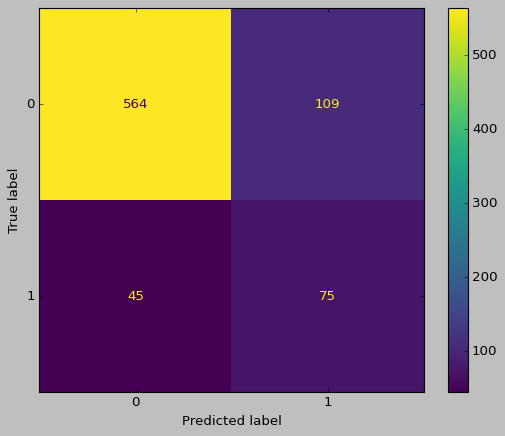

In [58]:
cm=confusion_matrix(y_pred,y_test)
style.use('classic')
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [59]:
accuracy_score(y_test,y_pred)

0.8058007566204287

In [60]:
import pickle

In [61]:
f=open('white','wb')
pickle.dump(clf2,f)

In [62]:
#testing

In [63]:
a=clf2.predict(sc.transform(np.array([[6.5,0.44,0.47,5.45,0.014,44,137,0.98984,3.13,0.32,13
]])
))

In [64]:
a[0]

1